In [285]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import itertools
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
from IPython.display import display

%matplotlib inline

In [286]:
# Read data from .csv files 
loc = "voetbal_new/"

raw_cards_file = pd.read_csv (loc + '_cards.csv')
raw_goals_file = pd.read_csv (loc + '_goals.csv')
raw_matches_file = pd.read_csv (loc + '_matches.csv')
raw_players_file = pd.read_csv (loc + '_players.csv')
raw_subs_file = pd.read_csv (loc + '_subs.csv')

In [287]:
# function to remove duplicates 
def Duplicates(rawName , colName: str, previousName: str, newName: str ):
        if colName == "club":
                rawName["home"].replace({previousName: newName }, inplace=True)
                rawName["away"].replace({previousName: newName }, inplace=True)
                rawName["team"].replace({previousName: newName }, inplace=True)
        elif colName == "match":
                rawName["home"].replace({previousName: newName }, inplace=True)
                rawName["away"].replace({previousName: newName }, inplace=True)
        elif colName == "card": 
                rawName["type"].replace({previousName: newName }, inplace=True)
        else:
                print("nothing")

In [288]:
def searchTeam(teams, teamName):
    for (k,i) in teams.items():
        if k == teamName:
            return (k, i)

In [289]:
# function used to get the last season
def toOneSeason(season):
    return season[5:len(season)]

In [290]:
#Function used for the matches:
def ClassifyMatches(row):
    if(row.home_score > row.away_score):
        return 1
    elif(row.home_score < row.away_score):
        return -1
    else:
        return 0

## Matches 

In [291]:
Duplicates(raw_matches_file, "match", "afc-ajax", "ajax-amsterdam")
Duplicates(raw_matches_file, "match", "willem-ii", "willem-ii-tilburg")
Duplicates(raw_matches_file, "match", "mvv", "mvv-maastricht")
Duplicates(raw_matches_file, "match", "vitesse", "vitesse-arnhem")
Duplicates(raw_matches_file, "match", "sc-cambuur", "cambuur-leeuwarden")
Duplicates(raw_matches_file, "match", "feyenoord", "feyenoord-rotterdam")
Duplicates(raw_matches_file, "match", "go-ahead-eagles_2", "go-ahead-eagles")

filtered_matches = raw_matches_file.drop(columns=['stadium','home_first_card','home_last_card',
                                                 'away_first_card', 'time','date',
                                                 'spectators', 'ref','linesman1','linesman2', 'away_last_card',
                                                 'home_yellow', 'home_yelred', 'away_yellow','first_goal', 'last_goal',
                                                  'away_red','home_red', 'away_yelred'])

filtered_matches.dropna()
filtered_matches

,Unnamed: 0,saison,round,home,away,home_score,away_score
0,0,1956-1957,16,ajax-amsterdam,bvc-amsterdam,2,3
1,1,1956-1957,27,ajax-amsterdam,fc-den-bosch,1,0
2,2,1956-1957,15,ajax-amsterdam,fc-utrecht,1,2
3,3,1956-1957,25,ajax-amsterdam,feyenoord-rotterdam,1,0
4,4,1956-1957,13,ajax-amsterdam,fortuna-54,0,2
...,...,...,...,...,...,...,...
19925,301,2021-2022,21,willem-ii-tilburg,rkc-waalwijk,3,1
19926,302,2021-2022,16,willem-ii-tilburg,cambuur-leeuwarden,1,3
19927,303,2021-2022,25,willem-ii-tilburg,sc-heerenveen,0,0
19928,304,2021-2022,12,willem-ii-tilburg,sparta-rotterdam,0,3


# Cards

In [292]:
Duplicates(raw_cards_file, "club", "afc-ajax", "ajax-amsterdam")
Duplicates(raw_cards_file, "club", "willem-ii", "willem-ii-tilburg")
Duplicates(raw_cards_file, "club", "mvv", "mvv-maastricht")
Duplicates(raw_cards_file, "club", "vitesse", "vitesse-arnhem")
Duplicates(raw_cards_file, "club", "sc-cambuur", "cambuur-leeuwarden")
Duplicates(raw_cards_file, "club", "feyenoord", "feyenoord-rotterdam")
Duplicates(raw_cards_file, "club", "go-ahead-eagles_2", "go-ahead-eagles")

Duplicates(raw_cards_file, "card", "rode kaart", "red-card")
Duplicates(raw_cards_file, "card", "rode", "red-card")
Duplicates(raw_cards_file, "card", "kaartrode", "red-card")
Duplicates(raw_cards_file, "card", "gele kaart", "yellow-card")
Duplicates(raw_cards_file, "card", "gele", "yellow-card")
Duplicates(raw_cards_file, "card", "kaartgele", "yellow-card")
Duplicates(raw_cards_file, "card", "geelrode kaart", "red-card")
raw_cards_file.drop(columns=['player','type'])
raw_cards_file['saison'] = raw_cards_file['saison'].apply(toOneSeason)
raw_cards_file['saison'] = raw_cards_file['saison'].astype(int)


df_cards = pd.DataFrame()
season = raw_cards_file['saison']
round = raw_cards_file['round']
home = raw_cards_file['home']
away = raw_cards_file['away']
team = raw_cards_file['team']
type = raw_cards_file['type']
yellowCards = raw_cards_file['type']
redCards = raw_cards_file['type']
home_cards = raw_cards_file['type']
away_cards = raw_cards_file['type']



df_cards['season'] =  season
df_cards['round'] =  round
df_cards['home'] =  home
df_cards['away'] =  away
df_cards['team'] =  team
df_cards['type'] =  type
df_cards['yellowCards'] =  yellowCards
df_cards['redCards'] =  redCards
df_cards['home_cards'] =  home_cards
df_cards['away_cards'] =  away_cards
df_cards["yellowCards"].replace({"red-card": 0, "yellow-card": 1 }, inplace=True)
df_cards["redCards"].replace({"red-card": 1, "yellow-card": 0 }, inplace=True)

df_cards.loc[(df_cards["home_cards"] == "red-card") & (df_cards["home"] == df_cards["team"]), "home_cards"] = "red"
df_cards.loc[(df_cards["away_cards"] == "red-card") & (df_cards["away"] == df_cards["team"]), "away_cards"] = "red"
df_cards.loc[(df_cards["home_cards"] == "yellow-card") & (df_cards["home"] == df_cards["team"]), "home_cards"] = "yellow"
df_cards.loc[(df_cards["away_cards"] == "yellow-card") & (df_cards["away"] == df_cards["team"]), "away_cards"] = "yellow"
df_cards["home_cards"].replace({"red-card": 0, "yellow-card": 0, "yellow": 1,  "red": 2 }, inplace=True)
df_cards["away_cards"].replace({"red-card": 0, "yellow-card": 0, "yellow": 1,  "red": 2 }, inplace=True)


df_cards[(df_cards['season'] >= 2012)]
df_cards

,season,round,home,away,team,type,yellowCards,redCards,home_cards,away_cards
0,1963,8,heracles-almelo,fc-twente,fc-twente,red-card,0,1,0,2
1,1972,5,fc-groningen,ajax-amsterdam,fc-groningen,red-card,0,1,2,0
2,1972,5,fc-groningen,ajax-amsterdam,ajax-amsterdam,red-card,0,1,0,2
3,1973,34,ajax-amsterdam,az-alkmaar,ajax-amsterdam,yellow-card,1,0,1,0
4,1973,34,ajax-amsterdam,az-alkmaar,az-alkmaar,yellow-card,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
32412,2022,12,willem-ii-tilburg,sparta-rotterdam,sparta-rotterdam,yellow-card,1,0,0,1
32413,2022,30,willem-ii-tilburg,vitesse-arnhem,vitesse-arnhem,yellow-card,1,0,0,1
32414,2022,30,willem-ii-tilburg,vitesse-arnhem,vitesse-arnhem,yellow-card,1,0,0,1
32415,2022,30,willem-ii-tilburg,vitesse-arnhem,vitesse-arnhem,yellow-card,1,0,0,1


In [293]:
df_cards_new = pd.DataFrame()
season = df_cards['season']
round = df_cards['round']
home = df_cards['home']
away = df_cards['away']
team = df_cards['team']
type = df_cards['type']
yellowCards = df_cards['yellowCards']
redCards = df_cards['redCards']
home_cards = df_cards['home_cards']
away_cards = df_cards['away_cards']


df_cards_new['season'] =  season
df_cards_new['round'] =  round
df_cards_new['home'] =  home
df_cards_new['away'] =  away
df_cards_new['team'] =  team
df_cards_new['type'] =  type
df_cards_new['yellowCards'] =  yellowCards
df_cards_new['redCards'] =  redCards
df_cards_new['yellow_card_home'] =  home_cards
df_cards_new['yellow_card_away'] =  away_cards
df_cards_new['red_card_home'] =  home_cards
df_cards_new['red_card_away'] =  away_cards

df_cards_new["yellow_card_home"].replace({2: 0, 1: 1, 0: 0}, inplace=True)
df_cards_new["yellow_card_away"].replace({2: 0, 1: 1, 0: 0}, inplace=True)
df_cards_new["red_card_home"].replace({2: 1, 1: 0, 0: 0}, inplace=True)
df_cards_new["red_card_away"].replace({2: 1, 1: 0, 0: 0}, inplace=True)

df_cards_new

,season,round,home,away,team,type,yellowCards,redCards,yellow_card_home,yellow_card_away,red_card_home,red_card_away
0,1963,8,heracles-almelo,fc-twente,fc-twente,red-card,0,1,0,0,0,1
1,1972,5,fc-groningen,ajax-amsterdam,fc-groningen,red-card,0,1,0,0,1,0
2,1972,5,fc-groningen,ajax-amsterdam,ajax-amsterdam,red-card,0,1,0,0,0,1
3,1973,34,ajax-amsterdam,az-alkmaar,ajax-amsterdam,yellow-card,1,0,1,0,0,0
4,1973,34,ajax-amsterdam,az-alkmaar,az-alkmaar,yellow-card,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32412,2022,12,willem-ii-tilburg,sparta-rotterdam,sparta-rotterdam,yellow-card,1,0,0,1,0,0
32413,2022,30,willem-ii-tilburg,vitesse-arnhem,vitesse-arnhem,yellow-card,1,0,0,1,0,0
32414,2022,30,willem-ii-tilburg,vitesse-arnhem,vitesse-arnhem,yellow-card,1,0,0,1,0,0
32415,2022,30,willem-ii-tilburg,vitesse-arnhem,vitesse-arnhem,yellow-card,1,0,0,1,0,0


In [294]:
groupByAwayYellowCard = df_cards_new.groupby(['season', 'round','home', 'away'], as_index=False).agg(yellowCards = ('yellowCards', 'sum'), 
                                                                                redCards = ('redCards', 'sum'),
                                                                                yellowCardHome = ('yellow_card_home', 'sum'),
                                                                                yellowCardAway = ('yellow_card_away', 'sum'),
                                                                                redCardHome = ('red_card_home', 'sum'),
                                                                                redCardAway = ('red_card_away', 'sum'))
groupByAwayYellowCard

,season,round,home,away,yellowCards,redCards,yellowCardHome,yellowCardAway,redCardHome,redCardAway
0,1963,8,heracles-almelo,fc-twente,0,1,0,0,0,1
1,1972,5,fc-groningen,ajax-amsterdam,0,2,0,0,1,1
2,1973,1,ado-den-haag,sparta-rotterdam,2,0,0,2,0,0
3,1973,1,feyenoord-rotterdam,nec-nijmegen,2,0,1,1,0,0
4,1973,1,nac-breda,go-ahead-eagles,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
11166,2022,30,fc-twente,sparta-rotterdam,3,0,0,3,0,0
11167,2022,30,feyenoord-rotterdam,fc-utrecht,3,0,1,2,0,0
11168,2022,30,nec-nijmegen,ajax-amsterdam,2,0,0,2,0,0
11169,2022,30,rkc-waalwijk,pec-zwolle,3,0,2,1,0,0


In [295]:
filtered_matches['saison'] = filtered_matches['saison'].apply(toOneSeason)
filtered_matches['saison'] = filtered_matches['saison'].astype(int)

df_MatchesForAjaxHost = pd.DataFrame()
season = filtered_matches['saison']
round = filtered_matches['round']
homeTeamAjax = filtered_matches['home']
awayTeamAjax = filtered_matches['away']
scoresAjaxHome = filtered_matches['home_score']
awayTeamScoresAjax = filtered_matches['away_score']

df_MatchesForAjaxHost['season'] = season
df_MatchesForAjaxHost['round'] = round
df_MatchesForAjaxHost['home'] = homeTeamAjax
df_MatchesForAjaxHost['away'] = awayTeamAjax
df_MatchesForAjaxHost['home_score'] = scoresAjaxHome
df_MatchesForAjaxHost['away_score'] = awayTeamScoresAjax
df_MatchesForAjaxHost['winning_team'] = df_MatchesForAjaxHost.apply(lambda row: ClassifyMatches(row),axis=1)
df_MatchesForAjaxHost[(df_MatchesForAjaxHost['home_score'] != '-') &
                      (df_MatchesForAjaxHost['away_score'] != '-')]
df_MatchesForAjaxHost

,season,round,home,away,home_score,away_score,winning_team
0,1957,16,ajax-amsterdam,bvc-amsterdam,2,3,-1
1,1957,27,ajax-amsterdam,fc-den-bosch,1,0,1
2,1957,15,ajax-amsterdam,fc-utrecht,1,2,-1
3,1957,25,ajax-amsterdam,feyenoord-rotterdam,1,0,1
4,1957,13,ajax-amsterdam,fortuna-54,0,2,-1
...,...,...,...,...,...,...,...
19925,2022,21,willem-ii-tilburg,rkc-waalwijk,3,1,1
19926,2022,16,willem-ii-tilburg,cambuur-leeuwarden,1,3,-1
19927,2022,25,willem-ii-tilburg,sc-heerenveen,0,0,0
19928,2022,12,willem-ii-tilburg,sparta-rotterdam,0,3,-1


# Merge Matches and Cards

In [296]:
df_merge= pd.merge(df_MatchesForAjaxHost,groupByAwayYellowCard,how='inner',left_on=['season','round','home', 'away'],right_on=['season','round','home', 'away'])
df_filter_season = df_merge[df_merge['season'] > 1980]

df_test = df_filter_season[(df_filter_season['home_score'] != '-') | (df_filter_season['away_score'] != '-')]

df_test["home_score"].replace({'-': '0'}, inplace=True)
df_test["away_score"].replace({'- afgebr.': '0'}, inplace=True)
df_test["away_score"].replace({'2 Toeg.': '0'}, inplace=True)
                                       
df_test.tail(10)

,season,round,home,away,home_score,away_score,winning_team,yellowCards,redCards,yellowCardHome,yellowCardAway,redCardHome,redCardAway
11161,2022,1,willem-ii-tilburg,feyenoord-rotterdam,0,4,-1,1,1,1,0,1,0
11162,2022,10,willem-ii-tilburg,fortuna-sittard,1,1,0,3,0,1,2,0,0
11163,2022,14,willem-ii-tilburg,go-ahead-eagles,0,1,-1,2,0,1,1,0,0
11164,2022,18,willem-ii-tilburg,nec-nijmegen,0,1,-1,0,1,0,0,1,0
11165,2022,7,willem-ii-tilburg,psv-eindhoven,2,1,1,3,0,1,2,0,0
11166,2022,21,willem-ii-tilburg,rkc-waalwijk,3,1,1,2,0,0,2,0,0
11167,2022,16,willem-ii-tilburg,cambuur-leeuwarden,1,3,-1,2,0,1,1,0,0
11168,2022,25,willem-ii-tilburg,sc-heerenveen,0,0,0,2,0,2,0,0,0
11169,2022,12,willem-ii-tilburg,sparta-rotterdam,0,3,-1,4,0,1,3,0,0
11170,2022,30,willem-ii-tilburg,vitesse-arnhem,1,0,1,4,0,0,4,0,0


# Data Visualization

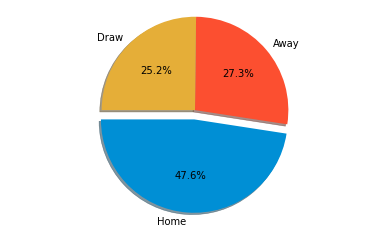

In [297]:
WinningHomeTeamFilter = filtered_matches[ (filtered_matches['home_score'] > filtered_matches['away_score'])]
WinningAwayTeamFilter = filtered_matches[ (filtered_matches['home_score'] < filtered_matches['away_score'])]
DrawTeamFilter = filtered_matches[ (filtered_matches['home_score'] == filtered_matches['away_score'])]

labels = ["Home", "Away", "Draw"]
sizes = [len(WinningHomeTeamFilter.index), len(WinningAwayTeamFilter.index),len(DrawTeamFilter.index) ]
explode = (0.1, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180)
ax1.axis('equal') 

plt.show()

Text(0, 0.5, 'Averages')

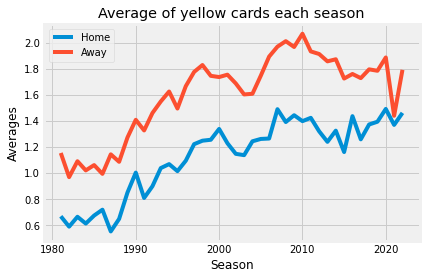

In [298]:
groubBy_yellow_card_EachSeason = df_test.groupby('season', as_index=False).agg(yellowCardHome = ('yellowCardHome', 'mean'),
                                                                yellowCardAway = ('yellowCardAway', 'mean'))

plt.plot(groubBy_yellow_card_EachSeason['season'], groubBy_yellow_card_EachSeason['yellowCardHome'], label="Home")
plt.plot(groubBy_yellow_card_EachSeason['season'], groubBy_yellow_card_EachSeason['yellowCardAway'], label="Away")
plt.legend()
plt.title("Average of yellow cards each season")
plt.xlabel("Season")
plt.ylabel("Averages")

Text(0, 0.5, 'Averages')

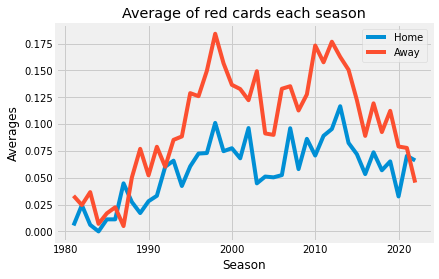

In [299]:
groubBy_red_card_EachSeason = df_test.groupby('season', as_index=False).agg(redCardHome = ('redCardHome', 'mean'),
                                                                redCardAway = ('redCardAway', 'mean'))

plt.plot(groubBy_red_card_EachSeason['season'], groubBy_red_card_EachSeason['redCardHome'], label="Home")
plt.plot(groubBy_red_card_EachSeason['season'], groubBy_red_card_EachSeason['redCardAway'], label="Away")
plt.legend()
plt.title("Average of red cards each season")
plt.xlabel("Season")
plt.ylabel("Averages")

Text(0, 0.5, 'Averages')

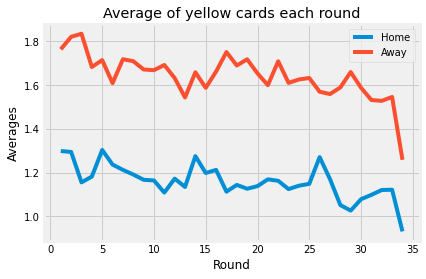

In [300]:
df_filter_round = df_test[df_test['round'] <= 34]
groubBy_yellow_card_EachRound = df_filter_round.groupby('round', as_index=False).agg(yellowCardHome = ('yellowCardHome', 'mean'),
                                                                yellowCardAway = ('yellowCardAway', 'mean'))

plt.plot(groubBy_yellow_card_EachRound['round'], groubBy_yellow_card_EachRound['yellowCardHome'], label="Home")
plt.plot(groubBy_yellow_card_EachRound['round'], groubBy_yellow_card_EachRound['yellowCardAway'], label="Away")
plt.legend()
plt.title("Average of yellow cards each round")
plt.xlabel("Round")
plt.ylabel("Averages")

Text(0, 0.5, 'Averages')

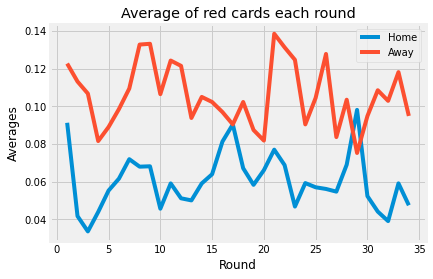

In [301]:
groubBy_red_card_EachRound = df_filter_round.groupby('round', as_index=False).agg(redCardHome = ('redCardHome', 'mean'),
                                                                redCardAway = ('redCardAway', 'mean'))

plt.plot(groubBy_red_card_EachRound['round'], groubBy_red_card_EachRound['redCardHome'], label="Home")
plt.plot(groubBy_red_card_EachRound['round'], groubBy_red_card_EachRound['redCardAway'], label="Away")
plt.legend()
plt.title("Average of red cards each round")
plt.xlabel("Round")
plt.ylabel("Averages")

In [302]:
groubBy_red_cardHome = df_test.groupby('redCardHome', as_index=False).agg(winning_team = ('winning_team', 'mean'))
groubBy_red_cardHome

,redCardHome,winning_team
0,0,0.204761
1,1,-0.161017
2,2,-0.461538


In [303]:
groubBy_red_cardAway = df_test.groupby('redCardAway', as_index=False).agg(winning_team = ('winning_team', 'mean'))
groubBy_red_cardAway

,redCardAway,winning_team
0,0,0.149294
1,1,0.486154
2,2,0.500000
3,3,1.000000


# Predictions

In [304]:
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split

label = LabelEncoder()

In [305]:
ids = label.fit_transform(df_test['away_score'])
mappingHome = dict(zip(label.classes_, range(len(label.classes_))))

In [306]:
ids = label.fit_transform(df_merge['home'])
mappingHome = dict(zip(label.classes_, range(len(label.classes_))))
print(list(mappingHome.keys())[list(mappingHome.values()).index(1)])

df_test["home"] = label.fit_transform(df_test['home'])
df_test["away"] = label.fit_transform(df_test['away'])

ajax-amsterdam


In [307]:
searchTeam(mappingHome, "ajax-amsterdam")

('ajax-amsterdam', 1)

In [308]:
X = df_test[["home","away"]]
y = df_test[["redCardAway"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [309]:
winning_team = tree.DecisionTreeClassifier()
winning_team.fit(X_train,y_train)

winning_team.score(X_test,y_test)

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and multilabel-indicator targets

In [ ]:
winning_team.predict([[1, 26]])

array([0], dtype=int64)